# Ejemplo de ML: Titanic

En conjunto de datos del hundimiento del titanic es uno de los más usados para los primeros ejercicios de aprendizaje automático.

Los datos incluyen varias características de los pasajeros, el objetivo es tratar de predecir, a partir de esas características, si un pasajero sobrevive o no al acccidente.

<font color='red'>
OBJETIVO: características de los pasajeros ---> ¿sobreviven?
<font>

<br>

El proceso involucra en general los siguientes pasos:
    
    - Leer los datos
    - EDA (Exploratory Data Analysis)
    - Data cleaning
    - Feature engeneering
    - train/test split
    - Determinar la complejidad del modelo
    - Aplicar el modelo
    - Validar el modelo y calcular las métricas
    - Probar con otros modelos

Aplicaremos varios modelos a este problema:
    
    - Regresión logística
    - Árboles de decisión
    - Random forests
    - Redes neuronales
    - SVM
    
   <br><br>
   _________

Importar módulos

In [3]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [4]:
import pickle

## 1. Leer los datos

Leer los datos (descargados de https://www.kaggle.com/c/titanic/data)

In [224]:
train = pd.read_csv('data/titanic_train.csv')
test  = pd.read_csv('data/titanic_test.csv')

## 2. EDA

In [14]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [15]:
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


Vemos que los dos DataFrames son iguales, salvo por la columna "Survived"

Lo primero es explorar los datos, para:

    - Entender su naturaleza
    - identificar datos faltantes
    - uniformizar unidades
    - transformar si es necesario
    - etc.

In [23]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [24]:
test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


Otras herramientas útiles: https://pandas.pydata.org/docs/getting_started/intro_tutorials/06_calculate_statistics.html

In [83]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [25]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [30]:
train.isna()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [42]:
train.isna().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

In [57]:
train.isna().any(axis=0).sum()

3

In [60]:
print(f'Esto indica que hay {train.isna().any(axis=0).sum()} columnas que tienen algún valor que no está determinado')

Esto indica que hay 3 columnas que tienen algún valor que no está determinado


In [61]:
train.isna().any(axis=1).sum()

708

In [63]:
print(f'Esto indica que hay {train.isna().any(axis=1).sum()} filas que tienen algún valor que no está determinado')

Esto indica que hay 708 filas que tienen algún valor que no está determinado


In [64]:
train.isna().any(axis=1)

0       True
1      False
2       True
3      False
4       True
       ...  
886     True
887    False
888     True
889    False
890     True
Length: 891, dtype: bool

In [66]:
train[train.isna().any(axis=1)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


o sea, la mayoría de las filas tiene algún problema...

In [77]:
for c in train.columns:
    print(f'{c:12s} {train[c].isna().sum()}')

PassengerId  0
Survived     0
Pclass       0
Name         0
Sex          0
Age          177
SibSp        0
Parch        0
Ticket       0
Fare         0
Cabin        687
Embarked     2


<AxesSubplot:xlabel='Survived', ylabel='count'>

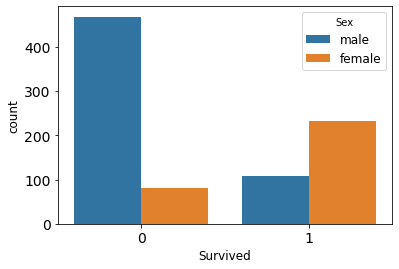

In [122]:
sns.countplot(x='Survived', data = train, hue='Sex')

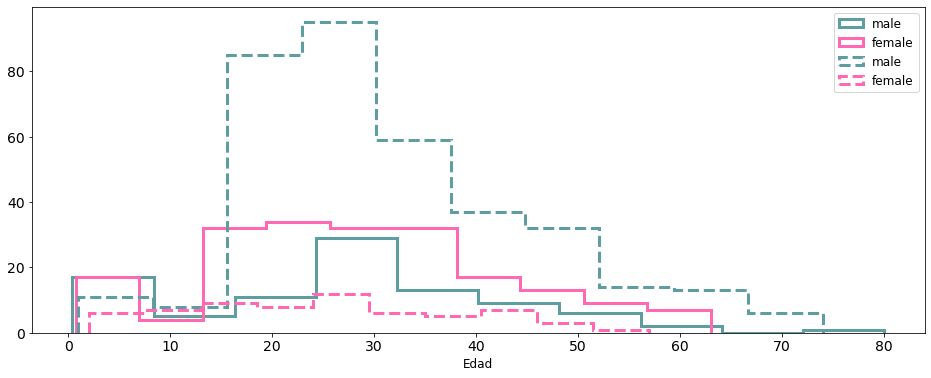

In [141]:
fig = plt.figure(figsize=(16, 6))
ax = fig.add_subplot()

ax.hist(train.Age[(train.Sex=='male') & (train.Survived==1)], 
        histtype='step', linewidth=3, label='male', color='cadetblue')
ax.hist(train.Age[(train.Sex=='female') & (train.Survived==1)], 
        histtype='step', linewidth=3, label='female', color='hotpink')
ax.hist(train.Age[(train.Sex=='male') & (train.Survived==0)], 
        histtype='step', linewidth=3, label='male', color='cadetblue', linestyle='--')
ax.hist(train.Age[(train.Sex=='female') & (train.Survived==0)], 
        histtype='step', linewidth=3, label='female', color='hotpink', linestyle='--')
ax.set_xlabel('Edad')
ax.legend()

Vemos que las mujeres sobreviven más que los hombres.

<AxesSubplot:ylabel='Frequency'>

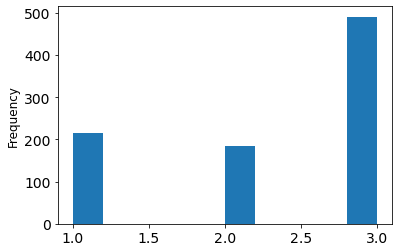

In [146]:
train.Pclass.plot.hist()

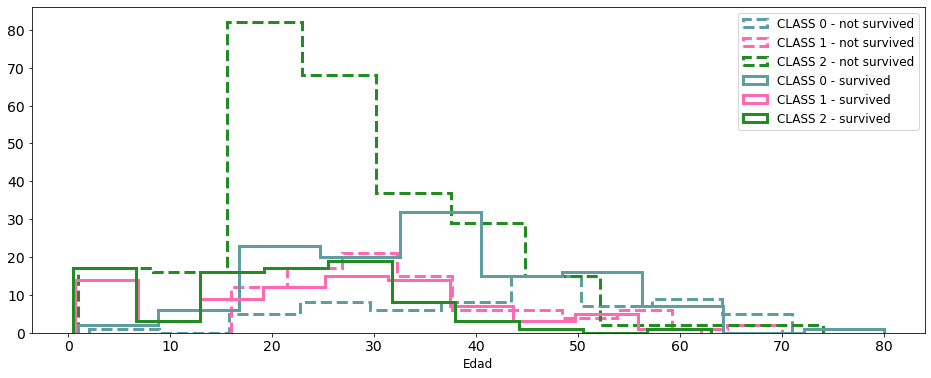

In [154]:
fig = plt.figure(figsize=(16, 6))
ax = fig.add_subplot()

ax.hist(train.Age[(train.Pclass==1) & (train.Survived==0)],
        histtype='step', linewidth=3, label='CLASS 0 - not survived', color='cadetblue', linestyle='--')
ax.hist(train.Age[(train.Pclass==2) & (train.Survived==0)],
        histtype='step', linewidth=3, label='CLASS 1 - not survived', color='hotpink', linestyle='--')
ax.hist(train.Age[(train.Pclass==3) & (train.Survived==0)],
        histtype='step', linewidth=3, label='CLASS 2 - not survived', color='forestgreen', linestyle='--')

ax.hist(train.Age[(train.Pclass==1) & (train.Survived==1)],
        histtype='step', linewidth=3, label='CLASS 0 - survived', color='cadetblue', linestyle='-')
ax.hist(train.Age[(train.Pclass==2) & (train.Survived==1)],
        histtype='step', linewidth=3, label='CLASS 1 - survived', color='hotpink', linestyle='-')
ax.hist(train.Age[(train.Pclass==3) & (train.Survived==1)],
        histtype='step', linewidth=3, label='CLASS 2 - survived', color='forestgreen', linestyle='-')



ax.set_xlabel('Edad')
ax.legend()

feo, no se entiende nada...

podemos ver las fracciones de supervivientes por clase:

In [174]:
for i in [1, 2, 3]:
    x = train[(train.Pclass==i) & train.Survived==1].shape[0] / train[train.Pclass==i].shape[0]
    print(f'En la clase {i} sobrevivió el {x*100:.0f}% de las personas')

En la clase 1 sobrevivió el 63% de las personas
En la clase 2 sobrevivió el 47% de las personas
En la clase 3 sobrevivió el 24% de las personas


In [175]:
for i in [1, 2, 3]:
    x = train.Survived[train.Pclass==i].mean()    
    print(f'En la clase {i} sobrevivió el {x*100:.0f}% de las personas')

En la clase 1 sobrevivió el 63% de las personas
En la clase 2 sobrevivió el 47% de las personas
En la clase 3 sobrevivió el 24% de las personas


In [177]:
# otra forma de hacerlo es usar groupby de pandas:

train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean()

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


Hasta ahora vimos que el sexo y la clase parecen determinar bastante bien la supervivencia.

In [204]:
S = (train.Sex=='female') & (train.Pclass==1)

x = train[S].Survived.mean()
print(f'Sobrevivió en {x*100:.0f}% de las mujeres en la clase alta')
x = train[~S].Survived.mean()
print(f'Sobrevivió en {x*100:.0f}% de los hombres en la clase baja')

Sobrevivió en 97% de las mujeres en la clase alta
Sobrevivió en 31% de los hombres en la clase baja


/home/mlares/.virtualenvs/astrometria/lib/python3.8/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


Text(0, 0.5, 'Cuanto pagó por el boleto')

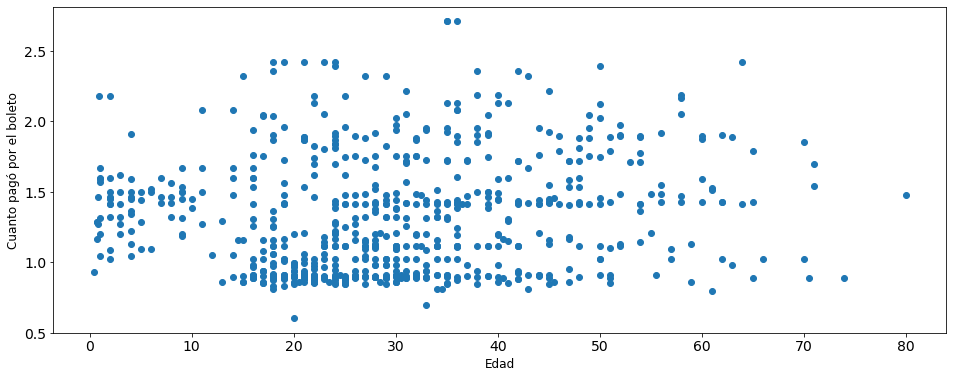

In [205]:
fig = plt.figure(figsize=(16, 6))
ax = fig.add_subplot()

ax.plot(train.Age, np.log10(train.Fare), marker='o', linestyle='None')
ax.set_xlabel('Edad')
ax.set_ylabel('Cuanto pagó por el boleto')

/home/mlares/.virtualenvs/astrometria/lib/python3.8/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mlares/.virtualenvs/astrometria/lib/python3.8/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


Text(0, 0.5, 'Cuanto pagó por el boleto')

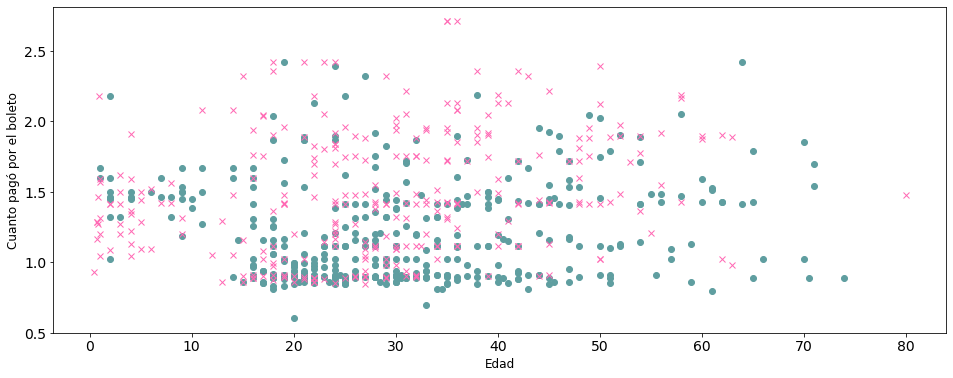

In [210]:
fig = plt.figure(figsize=(16, 6))
ax = fig.add_subplot()

S = train.Survived==0

ax.plot(train.Age[S], np.log10(train.Fare[S]), marker='o', linestyle='None', color='cadetblue')
ax.plot(train.Age[~S], np.log10(train.Fare[~S]), marker='x', linestyle='None', color='hotpink')
ax.set_xlabel('Edad')
ax.set_ylabel('Cuanto pagó por el boleto')

Veamos que pasa con las otras columnas:

In [211]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

<AxesSubplot:ylabel='Frequency'>

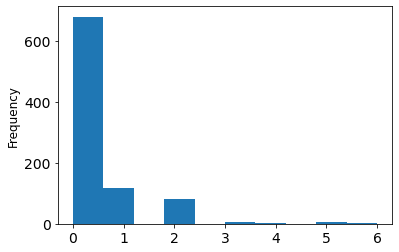

In [214]:
train.Parch.plot.hist()

In [217]:
train[['Parch', 'Survived']].groupby(['Parch'], as_index=False).mean()

,Parch,Survived
0,0,0.343658
1,1,0.550847
2,2,0.500000
3,3,0.600000
4,4,0.000000
5,5,0.200000
6,6,0.000000


<AxesSubplot:ylabel='Frequency'>

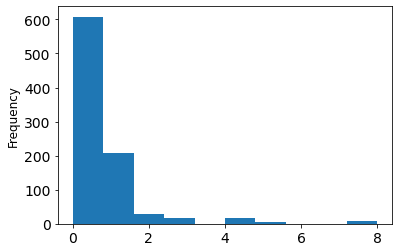

In [218]:
train.SibSp.plot.hist()

In [250]:
train[['SibSp', 'Survived']].groupby(['SibSp'], as_index=False).mean()

,SibSp,Survived
0,0,0.345395
1,1,0.535885
2,2,0.464286
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


/home/mlares/.virtualenvs/astrometria/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


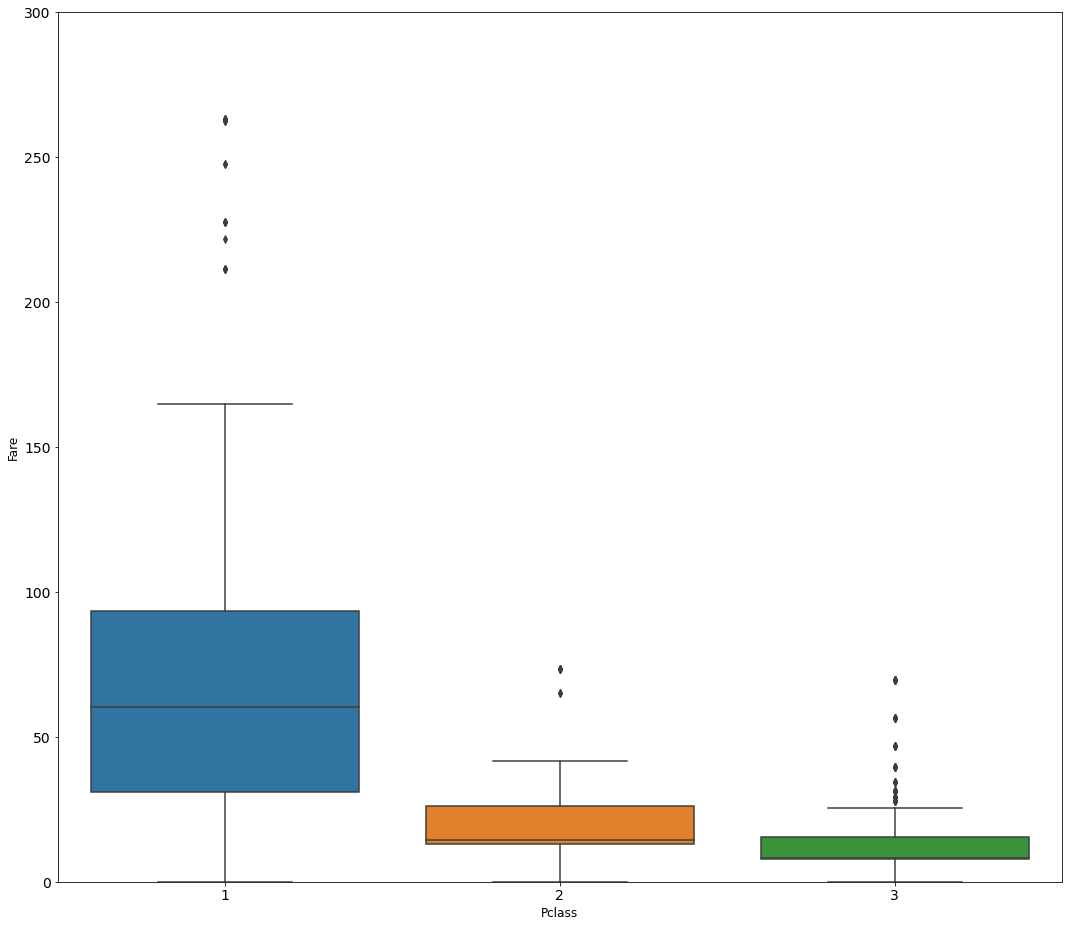

In [252]:
sns.boxplot('Pclass','Fare',data=train)
plt.ylim(0, 300) # ignore one data point with Fare > 500
plt.show()

## 3. Data cleaning

Vamos a eliminar las columnas que tienen muchos datos faltantes o que no sirven para determinar si una persona sobrevive o no.

In [226]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [227]:
train.drop(['PassengerId', 'Name', 'Cabin', 'Ticket', 'Embarked'], axis=1, inplace=True)

In [222]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare
0,0,3,male,22.0,1,0,A/5 21171,7.2500
1,1,1,female,38.0,1,0,PC 17599,71.2833
2,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250
3,1,1,female,35.0,1,0,113803,53.1000
4,0,3,male,35.0,0,0,373450,8.0500


## 4. Feature engeneering

La ingeniería de variables busca seleccionar las variables (features) que mejor describen o mejor predicen la etiqueta. También es posible crear nuevas variables o eliminar variables que o bien no aportan información sobre la etiqueta o bien correlacionan con otras y son por lo tanto redundantes.

In [356]:
train.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


ojo que aca no estás todos los features

In [355]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

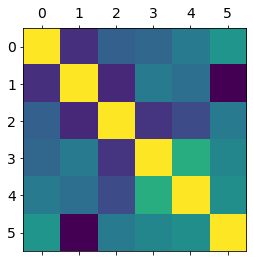

In [229]:
plt.matshow(train.corr())

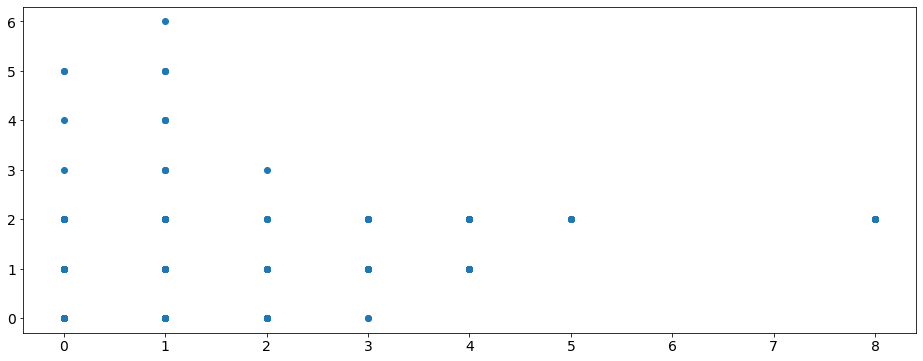

In [232]:
fig = plt.figure(figsize=(16, 6))
ax = fig.add_subplot()

ax.plot(train.SibSp, train.Parch, marker='o', linestyle='None')

/tmp/ipykernel_4764/1851911108.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  train.hist(ax=ax)


array([[<AxesSubplot:title={'center':'Survived'}>,
        <AxesSubplot:title={'center':'Pclass'}>],
       [<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'SibSp'}>],
       [<AxesSubplot:title={'center':'Parch'}>,
        <AxesSubplot:title={'center':'Fare'}>]], dtype=object)

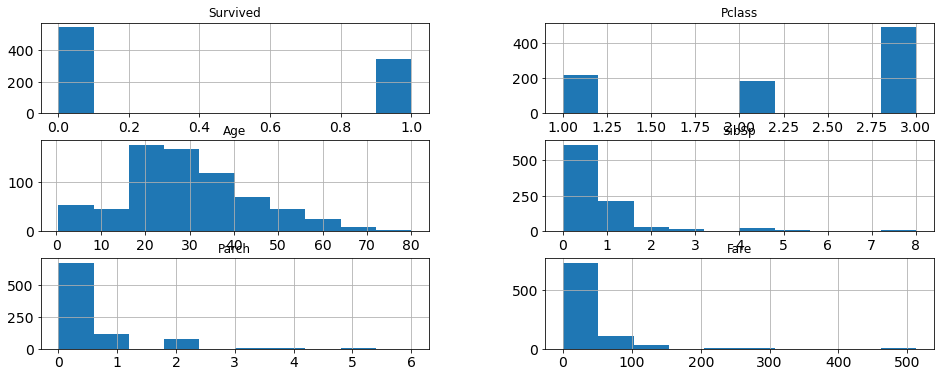

In [241]:
fig = plt.figure(figsize=(16, 6))
ax = fig.add_subplot()
train.hist(ax=ax)

/home/mlares/.virtualenvs/astrometria/lib/python3.8/site-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


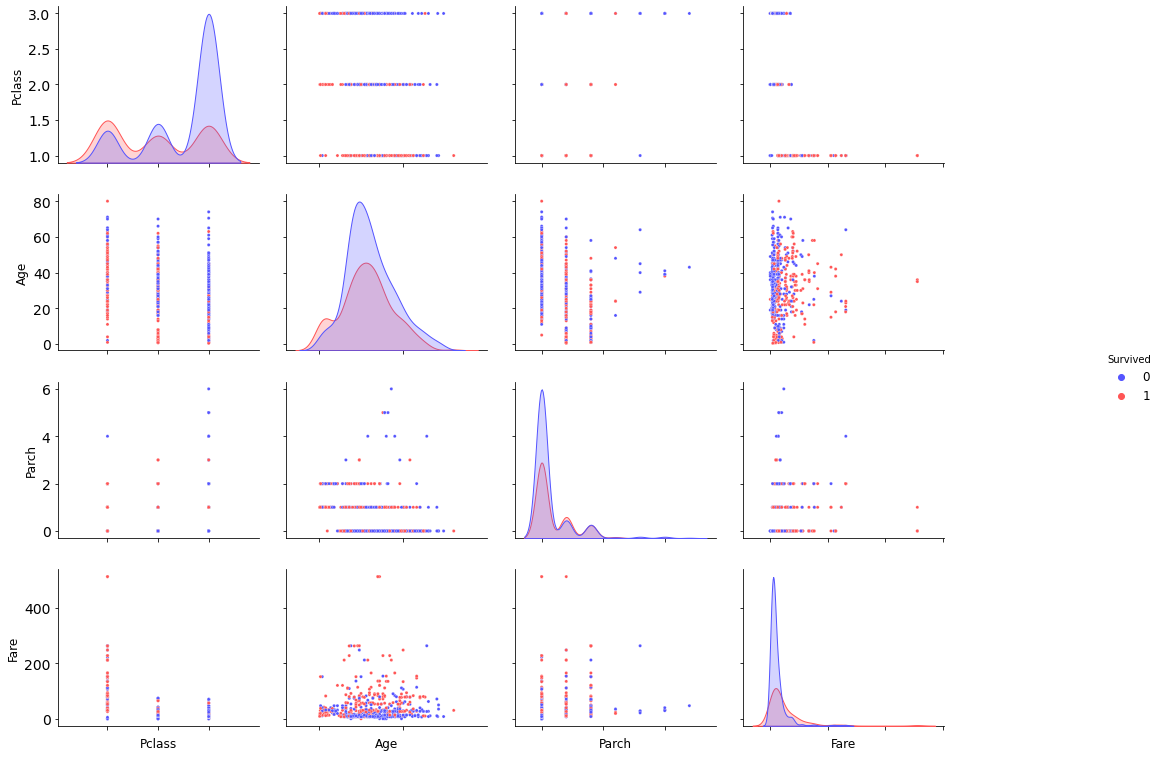

In [249]:
g = sns.pairplot(train[[u'Survived', u'Pclass', u'Sex', u'Age', u'Parch', u'Fare']], 
                 hue='Survived', palette = 'seismic',size=1.2,diag_kind = 'kde',diag_kws=dict(shade=True),plot_kws=dict(s=10) )
g.set(xticklabels=[])
g.fig.set_size_inches(18,12)

plt.show()

Antes de empezar a aplicar modelos, debemos tener los datos bien limpios y listos para usar. Ya limpiamos el dataframe train, ahora hacemos lo mismo con el dataframe test.

In [257]:
train

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500
...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000
887,1,1,female,19.0,0,0,30.0000
888,0,3,female,NaN,1,2,23.4500
889,1,1,male,26.0,0,0,30.0000


In [366]:
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


Otra cosa que hay que hacer es convertir variables categóricas (e.g., Sex) a variables numéricas

In [367]:
train.Sex

0        male
1      female
2      female
3      female
4        male
        ...  
886      male
887    female
888    female
889      male
890      male
Name: Sex, Length: 891, dtype: object

In [369]:
train['Sex'] = pd.factorize(train['Sex'])[0]

In [370]:
train.Sex

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    1
889    0
890    0
Name: Sex, Length: 891, dtype: int64

<br><br><br><br><br>
Para que quede claro todo el proceso, leemos los datos de nuevo y repetimos el tratamiento que hicimos:

In [426]:
train = pd.read_csv('data/titanic_train.csv')
test  = pd.read_csv('data/titanic_test.csv')

In [427]:
train_data = train.drop(['PassengerId', 'Name', 'Cabin', 'Ticket', 'Embarked'], axis=1)

In [428]:
train_data['Sex'] = pd.factorize(train_data['Sex'])[0]

In [429]:
train_data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,0,22.0,1,0,7.2500
1,1,1,1,38.0,1,0,71.2833
2,1,3,1,26.0,0,0,7.9250
3,1,1,1,35.0,1,0,53.1000
4,0,3,0,35.0,0,0,8.0500
...,...,...,...,...,...,...,...
886,0,2,0,27.0,0,0,13.0000
887,1,1,1,19.0,0,0,30.0000
888,0,3,1,NaN,1,2,23.4500
889,1,1,0,26.0,0,0,30.0000


In [430]:
train_data.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

In [431]:
train_data.isna().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
dtype: int64

In [432]:
train_data.shape

(891, 7)

In [433]:
train_data.dropna(axis=0, how='any', inplace=True)

In [434]:
train_data.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

In [435]:
train_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,0,22.0,1,0,7.2500
1,1,1,1,38.0,1,0,71.2833
2,1,3,1,26.0,0,0,7.9250
3,1,1,1,35.0,1,0,53.1000
4,0,3,0,35.0,0,0,8.0500


In [436]:
train_data.shape

(714, 7)

In [437]:
train_data.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
dtype: int64

In [438]:
train_data.head(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,0,22.0,1,0,7.2500
1,1,1,1,38.0,1,0,71.2833
2,1,3,1,26.0,0,0,7.9250
3,1,1,1,35.0,1,0,53.1000
4,0,3,0,35.0,0,0,8.0500


In [439]:
train_data.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
dtype: int64

In [440]:
test_data = test.drop(['PassengerId', 'Name', 'Cabin', 'Ticket', 'Embarked'], axis=1)

In [441]:
test_data['Sex'] = pd.factorize(test_data['Sex'])[0]

In [442]:
test_data.dropna(axis=0, how='any', inplace=True)

In [443]:
test_data.shape

(331, 6)

In [444]:
test_data.head()

,Pclass,Sex,Age,SibSp,Parch,Fare
0,3,0,34.5,0,0,7.8292
1,3,1,47.0,1,0,7.0000
2,2,0,62.0,0,0,9.6875
3,3,0,27.0,0,0,8.6625
4,3,1,22.0,1,1,12.2875


listo, nuestros datos son test_data y train_data. Por las dudas los guardamos:

In [445]:
import pickle

fileout = 'data/titanic_train.pk'
with open(fileout, 'wb') as f:
    pickle.dump(train_data, f)
    

fileout = 'data/titanic_test.pk'
with open(fileout, 'wb') as f:
    pickle.dump(test_data, f)    

In [446]:
filein = 'data/titanic_train.pk'
with open(filein, 'rb') as f:
    train_data = pickle.load(f)
    

filein = 'data/titanic_test.pk'
with open(filein, 'rb') as f:
    test_data = pickle.load(f)

<br><br><br><br><br><br>

## Modelo: Regresión logística

## Modelo: SVM

## Modelo: Random Forest

In [81]:
from sklearn.ensemble import RandomForestClassifier

y = train["Survived"]

features = ["Pclass", "Sex", "SibSp", "Parch"]
X = pd.get_dummies(train[features])
X_test = pd.get_dummies(test[features])

model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
model.fit(X, y)
predictions = model.predict(X_test)

output = pd.DataFrame({'PassengerId': test.PassengerId, 'Survived': predictions})
output.to_csv('submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!


In [82]:
output

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


## Modelo: ANN

In [5]:
filein = 'data/titanic_train.pk'
with open(filein, 'rb') as f:
    train_data = pickle.load(f)

filein = 'data/titanic_test.pk'
with open(filein, 'rb') as f:
    test_data = pickle.load(f)

In [3]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [4]:
import pickle

In [6]:
train_data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,0,22.0,1,0,7.2500
1,1,1,1,38.0,1,0,71.2833
2,1,3,1,26.0,0,0,7.9250
3,1,1,1,35.0,1,0,53.1000
4,0,3,0,35.0,0,0,8.0500
...,...,...,...,...,...,...,...
885,0,3,1,39.0,0,5,29.1250
886,0,2,0,27.0,0,0,13.0000
887,1,1,1,19.0,0,0,30.0000
889,1,1,0,26.0,0,0,30.0000


In [8]:
X_train = train_data.drop('Survived', axis=1)

In [9]:
X_train = X_train.values

In [10]:
X_train

array([[ 3.    ,  0.    , 22.    ,  1.    ,  0.    ,  7.25  ],
       [ 1.    ,  1.    , 38.    ,  1.    ,  0.    , 71.2833],
       [ 3.    ,  1.    , 26.    ,  0.    ,  0.    ,  7.925 ],
       ...,
       [ 1.    ,  1.    , 19.    ,  0.    ,  0.    , 30.    ],
       [ 1.    ,  0.    , 26.    ,  0.    ,  0.    , 30.    ],
       [ 3.    ,  0.    , 32.    ,  0.    ,  0.    ,  7.75  ]])

In [11]:
X_train.shape

(714, 6)

In [12]:
y_train = train_data.Survived

In [13]:
y_train = y_train.values

In [24]:
y_train

array([0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,

In [26]:
X_test = test_data.values

In [27]:
X_test

array([[  3.    ,   0.    ,  34.5   ,   0.    ,   0.    ,   7.8292],
       [  3.    ,   1.    ,  47.    ,   1.    ,   0.    ,   7.    ],
       [  2.    ,   0.    ,  62.    ,   0.    ,   0.    ,   9.6875],
       ...,
       [  3.    ,   1.    ,  28.    ,   0.    ,   0.    ,   7.775 ],
       [  1.    ,   1.    ,  39.    ,   0.    ,   0.    , 108.9   ],
       [  3.    ,   0.    ,  38.5   ,   0.    ,   0.    ,   7.25  ]])

In [15]:
import keras 
from keras.models import Sequential 
from keras.layers import Dense

2021-11-02 21:43:58.262161: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/lib
2021-11-02 21:43:58.262182: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [16]:
from keras_visualizer import visualizer

In [17]:
# Hagamos una red neuronal:
model = Sequential()

# layers
model.add(Dense(9, kernel_initializer = 'uniform', activation = 'relu', input_dim = 6))
model.add(Dense(9, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dense(5, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dense(1, kernel_initializer = 'uniform', activation = 'sigmoid'))

2021-11-02 21:44:01.252214: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/lib
2021-11-02 21:44:01.252233: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2021-11-02 21:44:01.252265: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (dellpc): /proc/driver/nvidia/version does not exist
2021-11-02 21:44:01.252452: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [18]:
# summary
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 9)                 63        
_________________________________________________________________
dense_1 (Dense)              (None, 9)                 90        
_________________________________________________________________
dense_2 (Dense)              (None, 5)                 50        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 6         
Total params: 209
Trainable params: 209
Non-trainable params: 0
_________________________________________________________________


In [20]:
# visualizer(model, format='png', view=True)

In [21]:
# Compiling the NN
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [22]:
# Train the NN
model.fit(X_train, y_train, batch_size = 32, epochs = 100)

2021-11-02 21:44:19.837813: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/100
23/23 [==============================] - 0s 611us/step - loss: 0.6925 - accuracy: 0.5784
Epoch 2/100
23/23 [==============================] - 0s 551us/step - loss: 0.6911 - accuracy: 0.5938
Epoch 3/100
23/23 [==============================] - 0s 1ms/step - loss: 0.6898 - accuracy: 0.5938
Epoch 4/100
23/23 [==============================] - 0s 570us/step - loss: 0.6886 - accuracy: 0.5938
Epoch 5/100
23/23 [==============================] - 0s 849us/step - loss: 0.6875 - accuracy: 0.5938
Epoch 6/100
23/23 [==============================] - 0s 631us/step - loss: 0.6865 - accuracy: 0.5938
Epoch 7/100
23/23 [==============================] - 0s 933us/step - loss: 0.6855 - accuracy: 0.5938
Epoch 8/100
23/23 [==============================] - 0s 588us/step - loss: 0.6846 - accuracy: 0.5938
Epoch 9/100
23/23 [==============================] - 0s 930us/step - loss: 0.6839 - accuracy: 0.5938
Epoch 10/100
23/23 [==============================] - 0s 567us/step - loss: 0.6832 - accuracy

In [33]:
y_pred = model.predict(X_test)

In [30]:
y_final = (y_pred > 0.5).astype(int).reshape(X_test.shape[0])

In [31]:
y_final

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [32]:
output = pd.DataFrame({'PassengerId': df_test['PassengerId'], 'Survived': y_final})
output.to_csv('prediction.csv', index=False)

NameError: name 'df_test' is not defined